<a href="https://colab.research.google.com/github/zyf2021/DL_materials/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%5Bhomework_4_2_%5Dgame_of_thrones_prediction_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

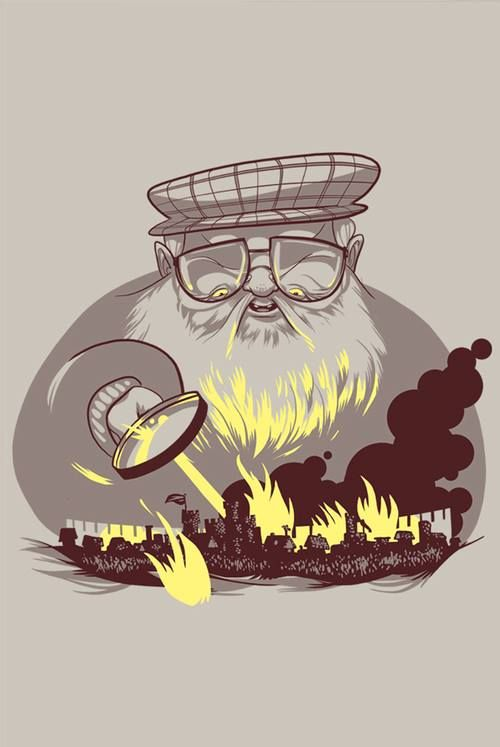

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 56.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 69.2MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data_train = pd.read_csv('/content/game_of_thrones_train.csv', index_col = 'S.No')
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col = 'S.No')
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

**Правила преобразования столбцов**

title -  yes-no Nan в no или OneHot

culture - yes-no Nan в no

dateOfBirth - mean

mother	father	heir - yes-no Nan в no

house	- yes-no Nan в no

spouse - not (yes-no) Nan в no

isAliveMother	isAliveFather	isAliveHeir	isAliveSpouse - Nan в no

age - mean

In [ ]:
# data_train['title'] = data_train['title'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['title'] = data_train['title'].str.lower().fillna('no')

data_train['dateOfBirth'] = data_train['dateOfBirth'].fillna(data_train['dateOfBirth'].mean())
data_train['mother'] = data_train['mother'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['father'] = data_train['father'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['heir'] = data_train['heir'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['spouse'] = data_train['spouse'].apply(lambda x: 0 if pd.isna(x) else 1)

data_train['isAliveMother'] = data_train['isAliveMother'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['isAliveFather'] = data_train['isAliveFather'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['isAliveHeir'] = data_train['isAliveHeir'].apply(lambda x: 0 if pd.isna(x) else 1)
data_train['isAliveSpouse'] = data_train['isAliveSpouse'].apply(lambda x: 0 if pd.isna(x) else 1)

data_train['house'] = data_train['house'].str.lower().fillna('no')

data_train['age'] = data_train['age'].fillna(data_train['age'].mean())

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             1557 non-null   object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       1557 non-null   float64
 5   mother            1557 non-null   int64  
 6   father            1557 non-null   int64  
 7   heir              1557 non-null   int64  
 8   house             1557 non-null   object 
 9   spouse            1557 non-null   int64  
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     1557 non-null   int64  
 16  isAliveFather     1557 non-null   int64  
 17  

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
data_train['isPopular'] = data_train['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

In [ ]:
data_train['boolDeadRelations'] = data_train['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
data_train['culture'] = data_train['culture'].str.lower().fillna('unknown')

In [ ]:
!pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.7 MB/s eta 0:00:00


In [ ]:
# from thefuzz import process



# name_culture = data_train['culture'].unique()
# name_culture = list(map(lambda x: x.lower(), name_culture))
# name_culture.sort()

# culture_mapping = {}

# for culture in name_culture:
#     # Проверяем, есть ли уже похожая запись в culture_mapping
#     result = process.extractOne(culture, culture_mapping.keys(), score_cutoff=70)

#     if result is not None:
#         match, score = result
#     else:
#         match, score = None, None

#     if match:
#         # Если найдено схожее значение, связываем его с основным вариантом
#         culture_mapping[culture] = culture_mapping[match]
#     else:
#         # Если похожих значений нет, оставляем как есть
#         culture_mapping[culture] = culture

# print("Словарь замен:")
# culture_mapping

Словарь замен:


{'andal': 'andal',
 'andals': 'andal',
 'astapori': 'astapori',
 'braavos': 'braavos',
 'braavosi': 'braavos',
 'crannogmen': 'crannogmen',
 'dorne': 'dorne',
 'dornish': 'dornish',
 'dornishmen': 'dornish',
 'dothraki': 'dothraki',
 'first men': 'first men',
 'free folk': 'free folk',
 'ghiscari': 'ghiscari',
 'ghiscaricari': 'ghiscari',
 'ironborn': 'ironborn',
 'ironmen': 'ironmen',
 'lhazareen': 'lhazareen',
 'lhazarene': 'lhazareen',
 'lysene': 'lysene',
 'lyseni': 'lysene',
 'meereenese': 'meereenese',
 'myrish': 'myrish',
 'northern mountain clans': 'northern mountain clans',
 'northmen': 'northern mountain clans',
 'norvoshi': 'norvoshi',
 'pentoshi': 'pentoshi',
 'qarth': 'qarth',
 'qartheen': 'qarth',
 'qohor': 'qohor',
 'reach': 'reach',
 'rivermen': 'rivermen',
 'sistermen': 'rivermen',
 'stormlands': 'andal',
 'summer islander': 'summer islander',
 'summer islands': 'summer islander',
 'summer isles': 'summer islander',
 'tyroshi': 'tyroshi',
 'unknown': 'unknown',
 'vale'

In [ ]:
# Применяем объединение к датасету
# data_train['culture'] = data_train['culture'].replace(culture_mapping)

In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
# Применяем объединение к датасету
data_train['culture'] = data_train['culture'].replace(cult)

In [ ]:
data_train.head()

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no,1,unknown,247.551971,1,1,1,no,0,...,1,0,0,0,35.290323,11,0.605351,0,1,1
2,Walder Frey,lord of the crossing,1,rivermen,208.000000,0,0,0,house frey,1,...,0,1,1,1,97.000000,1,0.896321,1,1,1
3,Addison Hill,ser,1,unknown,247.551971,0,0,0,house swyft,0,...,0,0,0,1,35.290323,0,0.267559,1,0,0
4,Aemma Arryn,queen,0,unknown,82.000000,0,0,0,house arryn,1,...,0,1,1,1,23.000000,0,0.183946,0,0,0
5,Sylva Santagar,greenstone,0,dornish,276.000000,0,0,0,house santagar,1,...,0,1,1,1,29.000000,0,0.043478,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data_train.drop(columns=['name', 'popularity', 'numDeadRelations'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

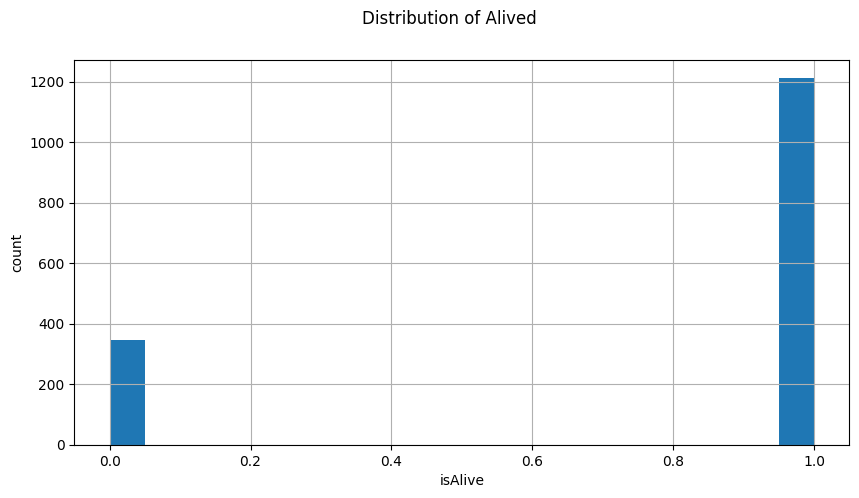

In [ ]:
plt.figure(figsize = (10, 5))

data_train['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('isAlive')

plt.suptitle('Distribution of Alived')
plt.show()

In [ ]:
print(data_train['isAlive'].value_counts(normalize=True))

isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64


Делаем вывод, что классы не сбалансированны, но не критично

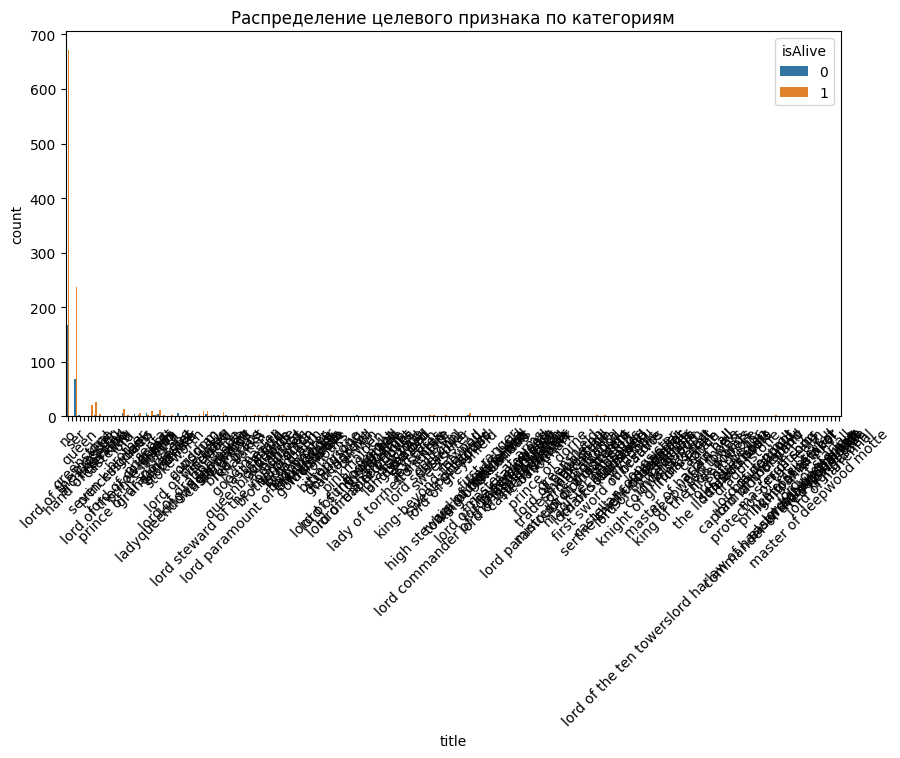

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='title', hue='isAlive', data=data_train)
plt.title("Распределение целевого признака по категориям")
plt.xticks(rotation=45)
plt.show()

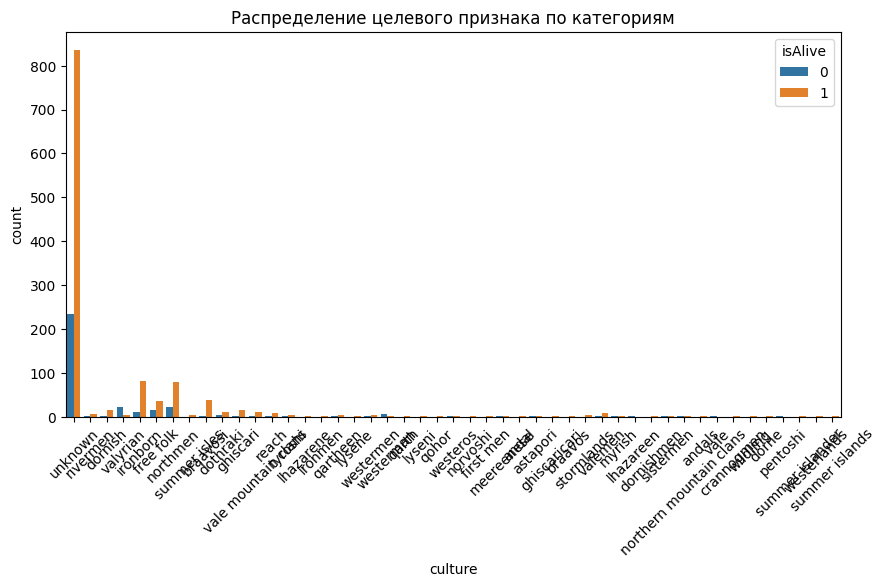

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='culture', hue='isAlive', data=data_train)
plt.title("Распределение целевого признака по категориям")
plt.xticks(rotation=45)
plt.show()

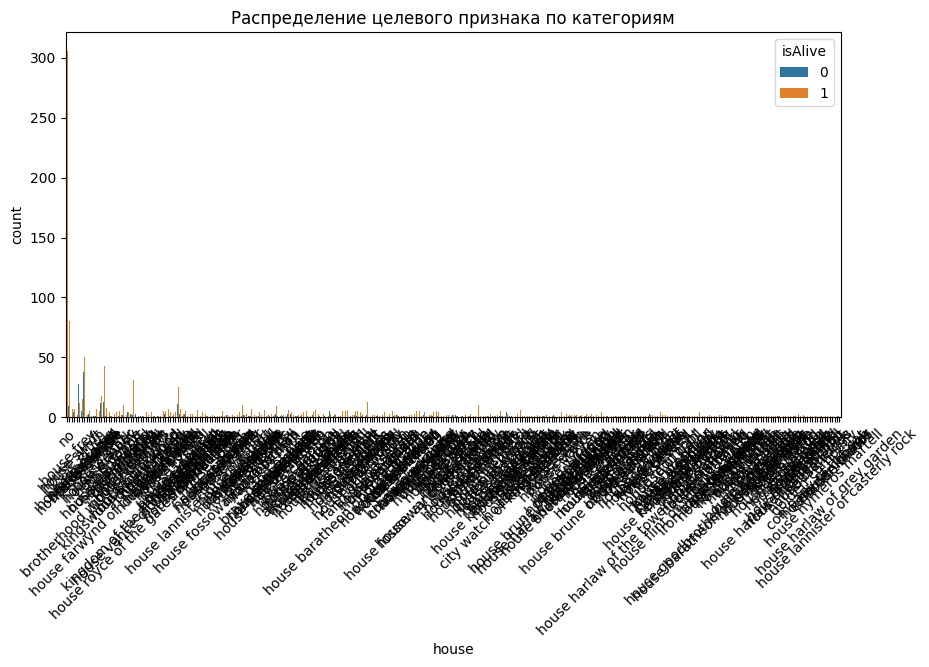

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='house', hue='isAlive', data=data_train)
plt.title("Распределение целевого признака по категориям")
plt.xticks(rotation=45)
plt.show()

Титулы и дома выглядят странно. Поэтому удалим еще и их

In [ ]:
data_train.drop(columns=['title', 'house'], inplace = True)

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
data_train.head()
categorical_features = ['culture']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(data_train[categorical_features])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_features), index=data_train.index)
one_hot_df

,culture_andal,culture_andals,culture_astapori,culture_braavos,culture_braavosi,culture_crannogmen,culture_dorne,culture_dornish,culture_dornishmen,culture_dothraki,...,culture_unknown,culture_vale,culture_vale mountain clans,culture_valemen,culture_valyrian,culture_westerlands,culture_westerman,culture_westermen,culture_westeros,culture_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded = pd.concat([data_train, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_features, axis=1)
df_encoded

,male,dateOfBirth,mother,father,heir,spouse,book1,book2,book3,book4,...,culture_unknown,culture_vale,culture_vale mountain clans,culture_valemen,culture_valyrian,culture_westerlands,culture_westerman,culture_westermen,culture_westeros,culture_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,247.551971,1,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.000000,0,0,0,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,247.551971,0,0,0,0,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.000000,0,0,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.000000,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,247.551971,0,0,0,0,1,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,247.551971,0,0,0,0,1,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,247.551971,0,0,0,0,0,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

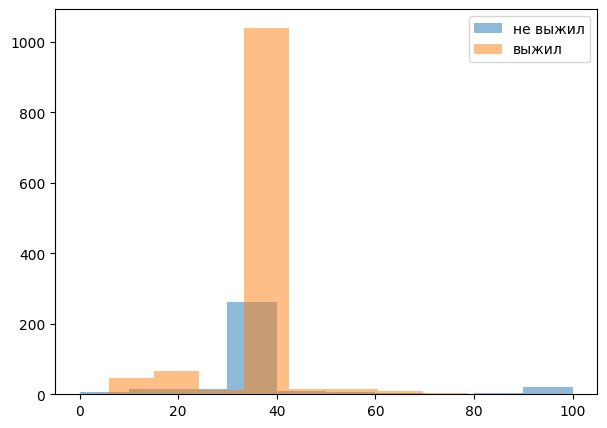

In [ ]:
plt.figure(figsize=(7, 5))

plt.hist(df_encoded['age'][df_encoded['isAlive'] == 0], alpha=0.5, label='не выжил')
plt.hist(df_encoded['age'][df_encoded['isAlive'] == 1], alpha=0.5, label='выжил')

plt.legend()

plt.show()

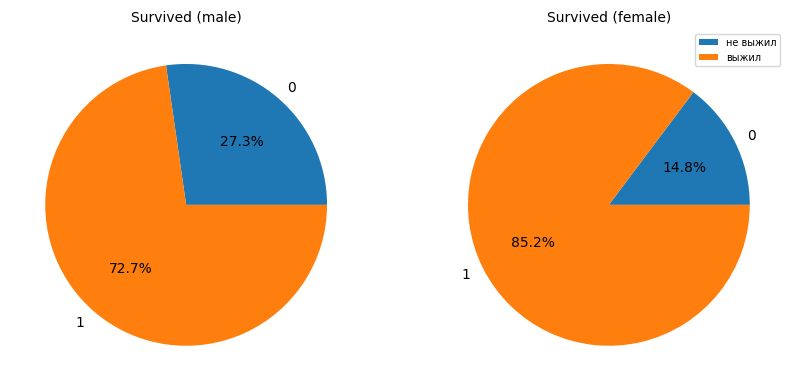

In [ ]:
# female - 0, male - 1
data_1 = df_encoded[df_encoded['male']== 1]['isAlive'].value_counts().sort_values()
data_2 = df_encoded[df_encoded['male']== 0]['isAlive'].value_counts().sort_values()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data_1.values, labels=data_1.index, autopct='%1.1f%%', textprops={'fontsize': 10})
ax2.pie(data_2.values, labels=data_2.index, autopct='%1.1f%%', textprops={'fontsize': 10})

ax1.set_title('Survived (male)', fontsize=10)
ax2.set_title('Survived (female)', fontsize=10)

plt.legend(['не выжил', 'выжил'], fontsize=7)

plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data_train.drop(['isAlive'], axis = 1)
y = data_train['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)